---
**Chapter Introduction**

---
- most ML applications are based on supervised learning
- Yann Lecun: "...unsupervised learning would be the cake, supervised learning would be the icing..., and reinforcement learning would be the cherry..."
---
- as discussed last chapter, dimensionality reduction is the most common unsupervised learning task
- in this chapter, we will look at a few more unsupervised learning algorithms


---
**Chapter Preview**

---
- *Clustering*: grouping similar images together, great for data analysis, customer segmentation, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, and more
---
- *Anomaly Detection*: learn to recognize "normal" data, and then use such an understanding to detect abnormal instances in need of correction, such as defective items on a production line or a new trend in a time series
---
- *Density Estimation*: estimating the *probability density function* (PDF) of the random process that generated the dataset | commonly used for anomaly detection (instances in very-low density regions are likely to be anomalies), data analysis, and data visualization

# Introduction to Clustering

In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

---
**Clustering Basics**

---
- identifying similar instances and assigning them to clusters (groups of similar instances)
- similar to classification: each instance gets assigned to a group
- classification, however, is supervised learning
- different clustering algorithms capture different kinds of clusters

In [0]:
from sklearn.datasets import load_iris

In [0]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classification_vs_clustering_plot


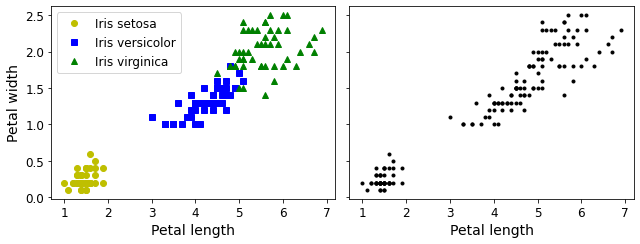

In [0]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_plot")
plt.show()

---
**Left Graph (classification)**

---
- iris dataset where each instance's species (i.e., its class) is represented w/ a different color marker
- iris dataset is labeled, for which classification algorithms such as Logistic Regression, SVMs, or Random Forest classifiers are well suited
---
**Right Graph (clustering)**

---
- iris dataset, but without labels, so classification algorithms do not work anymore
- this is where clustering algorithms go to work: the lower left-hand cluster is easy to detect, however, the two at the top are not so easy to distinguish
- clustering makes good use of all the features in a dataset 

---
**Clustering Example**

---
- a Gaussian mixture model can actually separate these clusters pretty well using all 4 features: petal length/width and sepal length/width

In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X) # training and prediction in 1 line of code

In [0]:
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

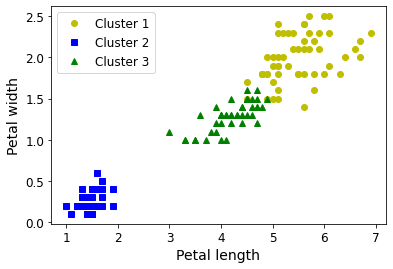

In [0]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

# K-Means Algorithm & its Applications

## KMeans Overview

In [0]:
# generating blobs
from sklearn.datasets import make_blobs

In [0]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [0]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [0]:
# plotting the blobs
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


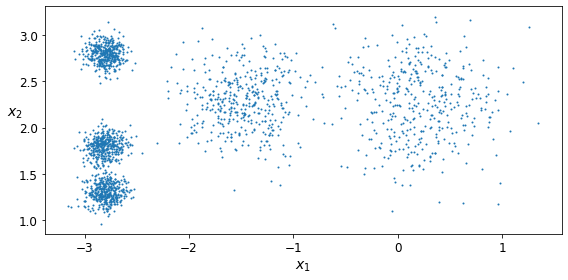

In [0]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

---
**Getting Familiar With K-Means**

---
- above are 5 blobs of instances
- K-Means algorithm is simple and capable of clustering this kind of dataset very quickly and efficiently 
- let's train a K-Means *clusterer* on this dataset: **the model will try to find each blob's center and assign each instance to the closest blob**
- the center of a blob is reffered to as a *centroid*

In [0]:
from sklearn.cluster import KMeans

k = 5 # for the number of blobs
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X) # fitting/predicting in 1 line of code

In [0]:
# each instance was assigned to 1 of 5 clusters
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [0]:
len(X), len(y_pred)

(2000, 2000)

- in the context of clustering, an instance's *label* is the index of the cluster that it gets assigned to (not to be confused with a class's label in classification)

In [0]:
y_pred is kmeans.labels_

True

- we can also look at the 5 centroids that the algorithm found

In [0]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

- it is easy to assign new instances to the cluster with the closest centroid

In [0]:
kmeans.labels_

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [0]:
# predicting the labels of new instances
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

---
**Decision Boundaries**

---
- plotting the model's decision boundaries yields a *Voronoi diagram* 

In [0]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


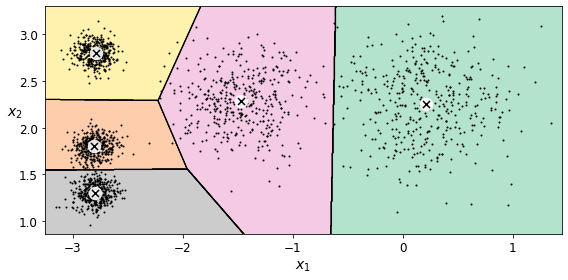

In [0]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

- the majority of instances were clearly assigned to the appropriate cluster, but a few, like in the top left, were probably mislabeled
---
**A Weakness of K-Means**

---
- the K-Means algorithm does not behave very well when the blobs have very different diameters because all it cares about is an instance's distance to the centroid
---
**Hard vs. Soft Clustering**

---
- *hard clustering* is assigning each instance to a single cluster
- *soft clustering* is giving each instance a score per cluster
- in the KMeans class, the transform() method measures the distance from each instance to every centroid, which can be a means of scoring each instance



In [0]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

- the first instance in X_new is located at a distance of 0.33 from the first centroid, 2.81 from the second centroid, etc. 
- if you transform a high-dimensional dataset this way, you end up with a $k$-dimensional dataset: this is a very efficient nonlinear dimensionality reduction technique

---
**The K-Means Algorithm In-Depth**

---
- starts by randomly placing the centroids (picking $k$ instances at random and using their locations as centroids)
- then label the instances, update the centroids, label the instances, update the centroids, label the instances, update the centroids, and so on until the centroids stop moving
- **the algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever**

In [0]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
       n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
       tol=0.0001, verbose=0)

Saving figure kmeans_algorithm_plot


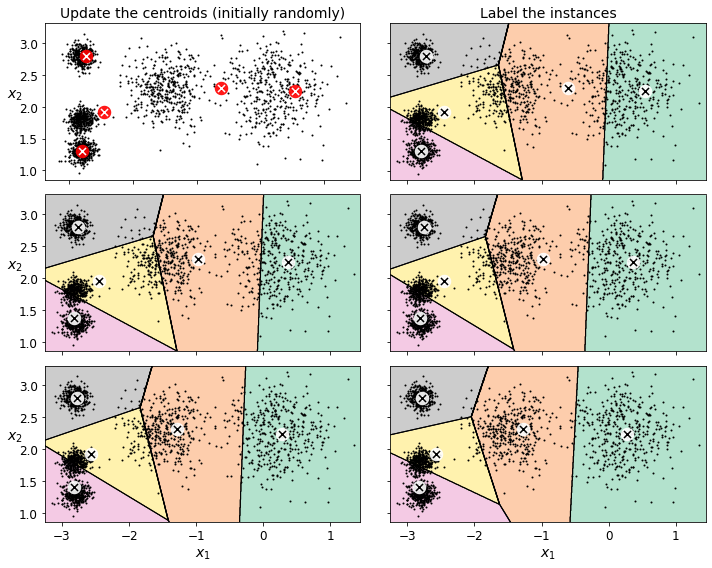

In [0]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

- centroids are initialized randomly (top left), then the instances are labeled (top right), then the centroids are updated (center left), then the instances are relabeled (center right), and so on
- in just 3 iterations, the algorithm reached an optimal clustering
- **although the algorithm is guaranteed to converge, it may not converge to the right solution (i.e., may converge to a local optimum): whether it does or not depends on the centroid initialization**
---
**Code Specific**

---
- KMeans class applies an optimized algorithm by default
- tweaking the hyperparameters would solely be for educational purposes

In [0]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


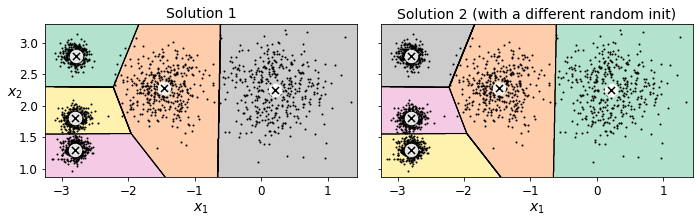

In [0]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()

---
**Centroid Initialization Methods**

---
- if you know approximately where the centroids should be (if you ran another clustering algorithm earlier, then you can set the init hyperparameter to a NumPy array containing the list of centroids, and set n_init to 1

In [0]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

- another solution is to run the algorithm multiple times with different random initializations and keep the best solution
- n_init is 10 by default: the whole algorithm we ran earlier ran 10 times when fit() was called (and Scikit-Learn keeps the best solution) 
---
**Performance Metric: Inertia**
- a model's *inertia* (mean squared distance betwween each instance and its closest centroid) is a measurement of its performance
- KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia

In [0]:
kmeans_rnd_init1.inertia_

211.59853725816822

In [0]:
kmeans_rnd_init2.inertia_

211.59853725816822

## Various K-Means Algorithm Improvements (K++, Accelerated KMeans, Mini-Batch KMeans)

---
**K-Means++**

---
- an important improvement to the K-Means algorithm was *K-Means++*
- the K-Means++ algorithm is much less likely to converge on a suboptimal solution as it contains a smarter initialization step that tends to select centroids that are distant from one another
---
**Its Process**

---
- 1) take one centroid $c_1$, chosen uniformly at random from the dataset
- 2) Take a new centroid $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen - this probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids
- 3) repeat previous step until all $k$ centroids have been chosen
--- 
- **KMeans class uses this initialization method by default** 
- to pick $k$ instances at random to define the initial centroids, set the init hyperparameter to "random" (you will rarely need to do this)


---
**Accelerated K-Means**

---
- another important improvement to the K-Means algorithm
- accelerates the algorithm by avoiding many unnecessary distance calculations
- **KMeans class uses this by defualt**

In [0]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X) # default Kmeans algorithm (as described above) (good for dense data)

50 loops, best of 3: 75.4 ms per loop


In [0]:
%timeit -n 50 KMeans(algorithm="full").fit(X) # regular KMeans algorithm (good for sparse data)

50 loops, best of 3: 107 ms per loop


---
**Mini-Batch K-Means**

---
- instead of using the full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration
- this makes it possible to cluster huge datasets that do not fit in memory and, obviously, speeds up the algorithm immensely
- **Scikit-Learn implements this algorithm in the MiniBatchKMeans class**

In [0]:
from sklearn.cluster import MiniBatchKMeans

In [0]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [0]:
minibatch_kmeans.inertia_

211.93186531476775

- if the dataset does not fit in memory, use the memmap class as we did for incremental PCA in Chapter 8

---
**Example With MNIST Dataset**

---

In [0]:
import urllib
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

- next: write it to a memmap

In [0]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [0]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=42,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

---
**Speed Comparison**

---

In [0]:
%timeit KMeans(n_clusters=5).fit(X)

10 loops, best of 3: 42.3 ms per loop


In [0]:
%timeit MiniBatchKMeans(n_clusters=5).fit(X)

10 loops, best of 3: 24.9 ms per loop


- MiniBatchKMeans is faster, however, its performance is often lower (higher inertia) and it keeps degrading as $k$ increases

In [0]:
from timeit import timeit

In [0]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

Saving figure minibatch_kmeans_vs_kmeans


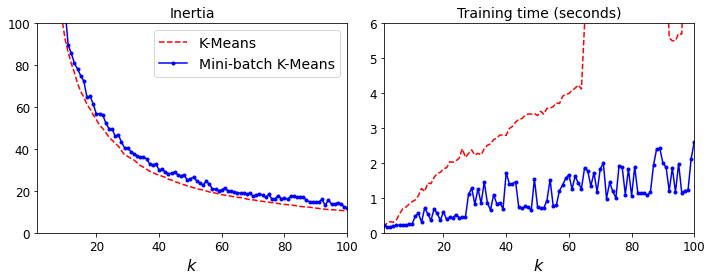

In [0]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

- Mini-batch K-Means has a higher inertia than K-Means (left) but it is much faster (right), especially as $k$ increases (however, Mini-batch K-Mean's performance lowers as $k$ increases, too)

## Finding the Optimal Number of Clusters for K-Means Algorithm (not as a preprocessing step)

---
**Finding the Optimal Number of Clusters**

---
- we set the number of clusters $k$ to 5 because it was obvious by looking at the data, but in general, it's not going to be that easy 
- when $k$ is too small, separate clusters get merged, and when $k$ is too big, some clusters get chopped into multiple pieces
- **inertia is not a good performance metric for deciding the number of clusters $k$ as inertia will always get lower as $k$ increases**

In [0]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

Saving figure inertia_vs_k_plot


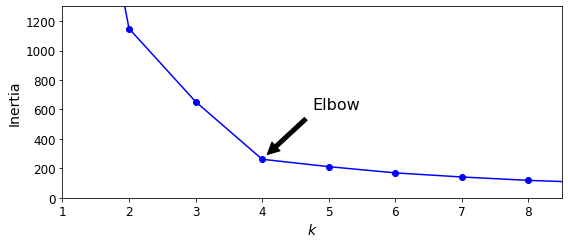

In [0]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

- when plotting the inertia as a function of the number of clusters $k$, the curve often contains an inflexion point called the "elbow"
- selecting $k$=4 for the number of clusters is rather coarse
---
**Silhouette Score: A Better Method For Determining $k$**

---
- more computationally expensive than plotting a graph, however it's more precise
- using the *silhouette score* (mean of the *silhouette coefficient* over all instances)
- **the silhouette coefficient can vary between -1 and +1**
- SC of +1: instance is well inside its own cluster and far from any others
- SC of 0: instance is close to a cluster boundary
- SC of -1: instance likely assigned to the wrong cluster
- use Scikit-Learn's silhouette_score() function, giving it all the instances in the dataset and the labels they were assigned

In [0]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_) # dataset, labels

In [0]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

Saving figure silhouette_score_vs_k_plot


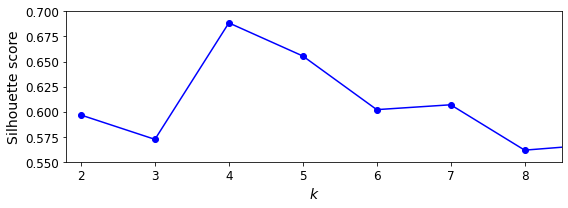

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

- this visualization is much richer than the previous one and confirms that $k$=4 is a very good choice
---
**Silhouette Diagram: An Even More Informative Visualization**

---
- an even more informative visualization is obtained when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient: a *silhouette diagram*

Saving figure silhouette_analysis_plot


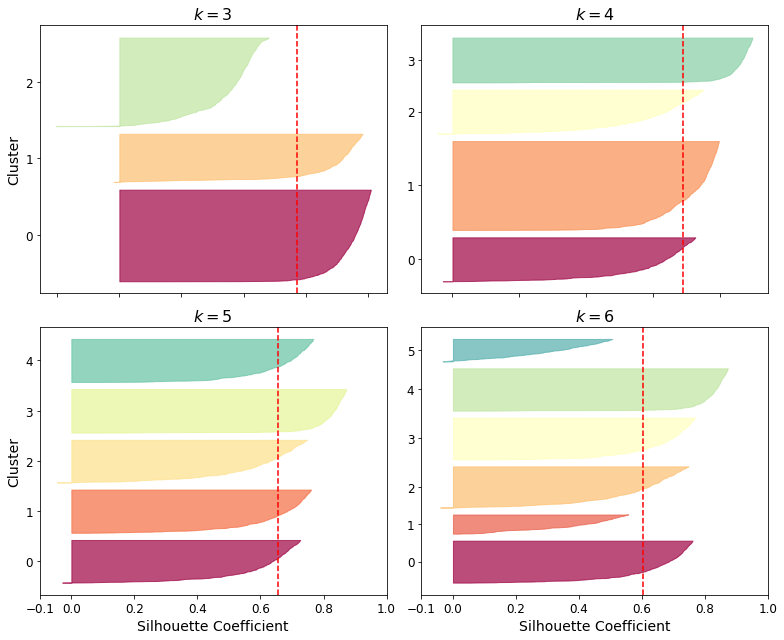

In [0]:
# EXTREMELY USEFUL CODE
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

---
**Silhouette Diagram: Graph Interpretation/Analysis**

---
- each diagram contains one knife shape per cluster
- shape's **height** represents the number of instances belonging to it
- shape's **width** represents the sorted silhouette coefficients of the instances in the cluster (**wider is better**) 
- the dashed line indicates the mean silhouette coefficient (-1 to +1)
- **when most of the instances in a cluster have a lower coefficient than this score (if many of the instances stop short of the dashed line, ending to the left of it) then the cluster is bad since this means its instances are far too close to other clusters**
- with that said, $k$=3 and $k$=6 are clearly bad
- **$k$=4 and $k$=5 look pretty good (most instances extend beyond the dashed line), however the shapes with $k$=5 are more consistently the same size, so $k$=5 is the best cluster as it is a good idea to get clusters of similar sizes**

---
**Limits of K-Means**

--- 
- despite being fast and scalable, K-Means has its flaws
- it requires a lot of trial and error (must run the algorithm several times) to avoid suboptimal solutions and finding the appropriate amount of clusters can be difficult
- K-Means does not behave well when the clusters have varying sizes, densities, and/or shapes

In [0]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [0]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Saving figure bad_kmeans_plot


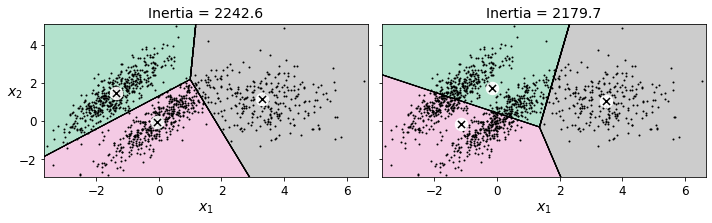

In [0]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

- as an example, K-Means fails to cluster these three ellipsoidal blobs properly
- both scores are terrible | a Gaussian mixture model would work great


## Using Clustering for Image Segmentation (used KMeans)

---
**Image Segmentation Background**

---
- ***image segmentation*** is the task of partitioning an image into multiple segments
---
- in ***semantic (image) segmentation***, all pixels of the same object type get assigned to the same segment
- for example, in a self-driving car's image system, all pixels that are part of a pedestrian's image might be assigned to the "pedestrian" segment
---
- in ***instance (image) segmentation***, all pixels that are part of the same individual object get assigned to the same segment 
- in this case, there would be a different segment for each pedestrian
---
- state of the art semantic/instance segmentation today is achieved using complex architectures based on convolutional neural networks
- the main focus of this chapter is much simpler: color segmentation (assigning pixels to the same segment if they are the same color) 
- we will use Matplotlib's imread() function to load the image


In [0]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7f5715d3e240>)

In [0]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

---
**About the Image (flower with ladybug)**

---
- the image is represented as a 3D array
- 1st dimension = height
- 2nd dimension = width
- 3rd dimension = number of color channels
- for each pixel there is a 3D vector containing the intensities of red, green and blue (RGB), each between 0.0 and 1.0
- **the following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means**

In [0]:
X = image.reshape(-1, 3)
X

array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       ...,
       [0.03921569, 0.22745098, 0.        ],
       [0.01960784, 0.20392157, 0.        ],
       [0.00784314, 0.1882353 , 0.        ]], dtype=float32)

In [0]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [0]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img

In [0]:
segmented_img = segmented_img.reshape(image.shape)
segmented_img

In [0]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram


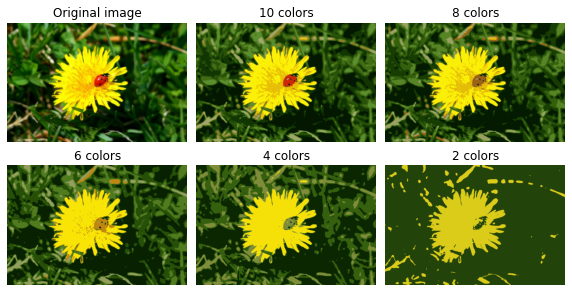

In [0]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

- when we use fewer than eight clusters, the ladybug's flashy red color fails to get a cluster of its own and it slowly turns green and yellow (K-Means prefers clusters of similar sizes... the ladybug is very small, and the algorithm eventually fails to dedicate a cluster to it)

---
**Experimenting With My Own Image**

---

In [0]:
image = imread("addyrae.jpg", format=None)
image.shape
image

array([[[224, 217, 199],
        [225, 218, 200],
        [227, 220, 202],
        ...,
        [202, 190, 168],
        [202, 190, 168],
        [202, 190, 168]],

       [[224, 217, 199],
        [225, 218, 200],
        [226, 219, 201],
        ...,
        [201, 189, 167],
        [201, 189, 167],
        [201, 189, 167]],

       [[225, 218, 200],
        [225, 218, 200],
        [225, 218, 200],
        ...,
        [199, 187, 165],
        [200, 188, 166],
        [200, 188, 166]],

       ...,

       [[178, 154, 126],
        [178, 154, 126],
        [178, 154, 126],
        ...,
        [ 61,  66,  85],
        [ 63,  68,  87],
        [ 55,  60,  79]],

       [[178, 154, 126],
        [178, 154, 126],
        [178, 154, 126],
        ...,
        [ 53,  58,  77],
        [ 56,  61,  80],
        [ 49,  54,  73]],

       [[178, 154, 126],
        [178, 154, 126],
        [178, 154, 126],
        ...,
        [ 44,  49,  68],
        [ 48,  53,  72],
        [ 44,  49,  68]]

In [0]:
image = np.array(image/255) # vector values need to be between 0 and 1

In [0]:
X = image.reshape(-1, 3)

In [0]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [0]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [0]:
segmented_imgs = []
n_colors = (16, 12, 8, 4, 2) # needs a lot more than 16 clusters!
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram2


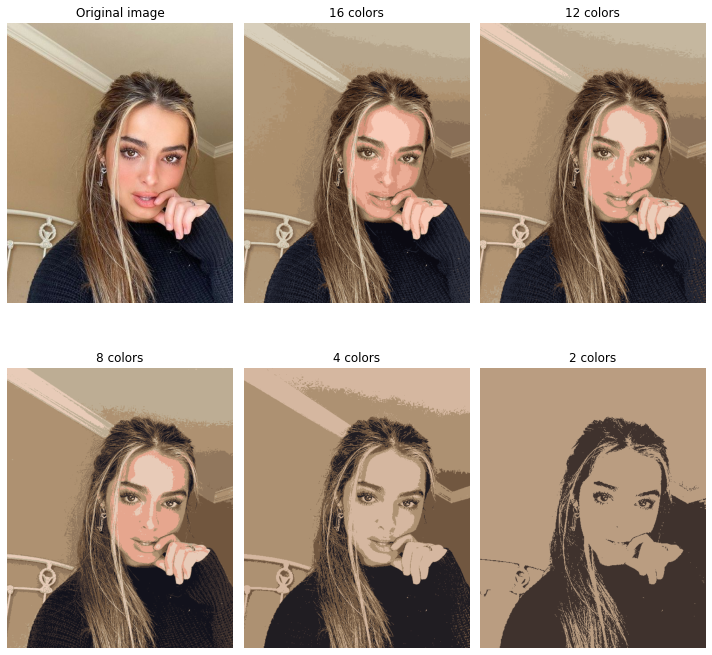

In [0]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram2', tight_layout=True)
plt.show()

## Using Clustering for Preprocessing (used KMeans then Logistic Regression)

- clustering can be an efficient approach to dimensionality reduction as a preprocessing step before a supervised learning algorithm
- as an example of using clustering for dimensionality reduction, we will use the digits dataset (similar to MNIST) containing 1,797 grayscale 8x8 images representing the digits 0 to 9

In [0]:
from sklearn.datasets import load_digits

In [0]:
X_digits, y_digits = load_digits(return_X_y=True)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

- fitting a Logistic Regression model and evaluating it's accuracy on the test set

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg.score(X_test, y_test)

0.9688888888888889

- we have a baseline of 96.9% accuracy 
- **now we will try using K-Means as a preprocessing step by first creating a pipeline that will first cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters, then apply a Logistic Regression model**

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [0]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=50, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

---
**IMPORTANT TIP**

---
- as there are 10 different digits, it is tempting to set the number of clusters to 10, however, each digit can be written several different ways, so it is preferable to use a larger number of clusters, such as 50, with digits if they are not all written the same

In [0]:
pipeline.score(X_test, y_test)

0.98

- we improved the model, however, 50 was an arbitrary number for $k$ so we can surely do better
---
**Picking $k$ for Preprocessing is Easy**

---
- **since K-Means is just a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier**
- no need to perform silhouette analysis or minimize the inertia; the best value of $k$ is simply the one that results in the best classification performance during cross-validation
- **we can use GridSearchCV to find the best value for $k$**

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
param_grid = dict(kmeans__n_clusters=range(2, 100)) # how param_grid should look for finding k

In [0]:
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2) # model, param_grid, other hyperparameters

In [0]:
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.2s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed: 20.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=50, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('log_reg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                      

In [0]:
grid_clf.best_params_ # shows us the best value for the specified grid_params --> k (99)
# says 99 in the book, you get the idea

{'kmeans__n_clusters': 57}

In [0]:
grid_clf.score(X_test, y_test) # this would ideally be the next step, in which a better score should be shown

0.98

In [0]:
# experimenting with more clusters, 120 seems to be a good amount
pipeline2 = Pipeline([
    ("kmeans", KMeans(n_clusters=120, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=120, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=5000,
                                    multi_class='ovr', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [0]:
pipeline2.score(X_test, y_test) # gridsearchcv showed us that more clusters=better --> 120 worked great

0.9844444444444445

## Using Clustering for Semi-Supervised Learning (used KMeans then Logistic Regression)

---
**Semi-Supervised Learning**

---
- very few labeled instances with majority unlabeled instances
- clustering is used for semi-supervised learning
- let's train a Logistic Regression model on a sample of 50 **labeled** instances from the digits dataset (**pretending we only have 50 labeled instances** for educational purposes) 

In [0]:
n_labeled = 50 

In [0]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42) # the model
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled]) # training on 50 instances
log_reg.score(X_test, y_test) # testing on entire test set

0.8333333333333334

- score is obviously much worse as we trained on 50 instances instead of the full training set
---
**Using Clustering to Make Up for a Lack of Labeled Instances**

---
- 1) cluster the training set into 50 clusters 
- 2) for each cluster, find the image closest to the centroid
- 3) these images will be the *representative images*

In [0]:
k = 50

In [0]:
# using kmeans with 50 clusters on the training data
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

# representative images = images closest to centroid
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

- next let's plot the representative images

Saving figure representative_images_diagram


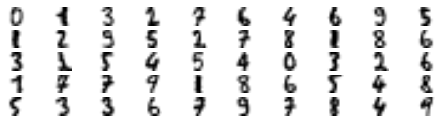

In [0]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

- 50 representative images (1 per cluster)
- next we have to **manually label each image**

In [0]:
# this was rather tedious
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 2, 8, 6,
    3, 2, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

- we have a dataset with 50 labeled images, but instead of being random instances, they are now representative images of their cluster, let's check our new performance

In [0]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

- let's go one step further and propgate the labels to all the other instances in the same cluster (*label propagation*)

In [0]:
# label propagation
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [0]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg.score(X_test, y_test) # a definite improvement!

0.9133333333333333

- let's go one step further and **propagate the labels to the 20% of instances that are closest to the centroids for improved accuracy** as we likely propagated instances close to cluster boundaries

In [0]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [0]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [0]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
log_reg.score(X_test, y_test) # this did not help, though it did in the book, basic propgation worked the best for us

0.8733333333333333

- the accuracy of the propagated labels is pretty good

In [0]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9584775086505191

- overall, with just 50 labeled instances (5 per class on average), wwe got 91% accuracy
- this was due to the fact that the accuracy of the propagated labels was high

---
**Active Learning**

---
- to continue improving the model and training set, do a few rounds of *active learning*, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them
- below is information regarding the *uncertain sampling* strategy for active learning
---
**Uncertain Sampling Strategy (Active Learning)**

---
- 1) the model is trained on the labeled instances gathered so far, and the model is used to make predictions on all the unlabeled instances (what we did)
- 2) **the instances for which the model is most certain (when its estimated probability is lowest) are given to the expert to be labeled**
- 3) iterate the process until the performance improvement stops being worth the labeling effort
---
- other strategies include labeling the instances that would result in the largest model change or the largest drop in the model's validation error, or the instances that different models disagree on (e.g., an SVM or Random Forest) 

# DBSCAN

- DBSCAN algorithm defines clusters as continuous regions of high density
---
**How DBSCAN Algorithm Works**

---
- for each instance, the algorithm counts how many instances are located within a small distance (epsilon) from it --> this region is called the instance's epsilon-neighborhood
- if an instance has at least min_samples instances in its epsilon-neighborhood (including itself), then it is considered a *core instance*
- core instances are located in dense regions
- all instances in the neighborhood of a core instance belong to the same cluster
- a core instance's neighborhood can include other core instances, therefore, a long sequence of neighboring core instances forms a cluster
- **any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly**
---
- **DBSCAN algorithm works well if all the clusters are dense and well separated by low-density regions**
- let's use the Scikit-Learn's DBSCAN class on the moons dataset

In [0]:
# preparing the data
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [0]:
# training the model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5) # eps=0.5 is the default (must be less than or equal to 0.05 away for an instance to be in one's neighborhood)
                                         # a core-instance is an instance with at least 5 instances (including itself) in its neighborhood
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

- the labels of all the instances are now available (they have been placed into clusters)

In [0]:
dbscan.labels_[:10] # the labels of 1000 instances (the cluster they have all been placed into)
# length: 1000

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [0]:
np.unique(dbscan.labels_) # 7 different clusters and anomalies

array([-1,  0,  1,  2,  3,  4,  5,  6])

- **instances that have a label index of -1 are considered to be anomalies**
- indices of core instances are available through core_sample_indices_

In [0]:
dbscan.core_sample_indices_[:10] # so, the 0th instance and the 4th instance are both core instances
# length: 80

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

- core instances themselves are available through components_

In [0]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [0]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [0]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Saving figure dbscan_plot


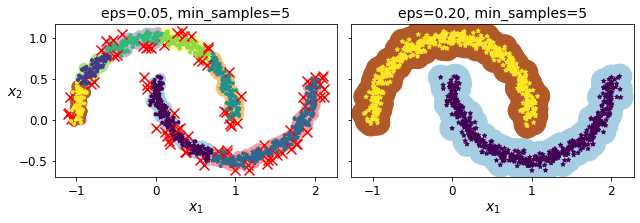

In [0]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()

- (left) the first model identified a lot of anomalies
- (right) if each instance's neighborhood is widended, the clustering is perfected
- **DBSCAN does not have predict(), it only has fit_predict(), which means it cannot predict which cluster a new instance belongs to**

---
**Training a KNeighborsClassifier (substitute for lack of predict() method)**

---

In [0]:
len(dbscan.components_), len(dbscan.labels_[dbscan.core_sample_indices_])

(808, 808)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_]) # the core instances, which cluster they belong to

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

- **now, given new instances, we can predict which cluster they most likely belong to an even estimate a probability for each cluster**

In [0]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]) # various datapoints
knn.predict(X_new) # predicts which clusters each point would fall into

array([6, 0, 3, 2])

In [0]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

- the model was trained on the core instances only, but we could have chosen to train the model on all the instances, or all but the anomalies: this choice depends on the desired specifications of the final task

Saving figure cluster_classification_plot


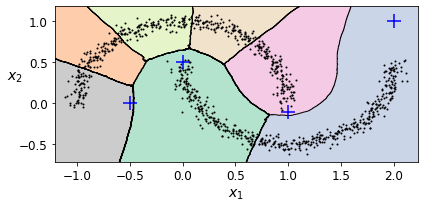

In [0]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

- crosses represent the 4 new instances in X_new
- since we only trained the model on core instances, there were no anomalies in the training set, so the classifier always chooses a cluster even when said cluster is far away
- we will use the kneighbors() method of the KNeighborsClassifier to classify these anomalies

In [0]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1) # introduced a maximum distance (if surpassed, instance classified as an anomaly)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel() # half the instances are now correctly classified as anomalies

array([-1,  0,  3, -1])

---
**Concluding Statements Regarding DBSCAN**

---
- very simple and powerful **capable of identifying any number of clusters of any shape**
- handles outliers with ease
- only 2 hyperparameters (eps and min_samples) 
- however, it only works if the clusters have similar densities
- *Hierarchial DBSCAN* (HDBSCAN) is another option, which only has 1 hyperparameter and is robust to clusters of varying densities

# Other Clustering Algorithms

---
**Agglomerative Clustering**

---
- hierarchy of clusters built from bottom up
- starting with individual instances, agglomerative clustering connects the nearest pair of clusters
- **scales very well to large numbers of instances/clusters provided a connectivity matrix**
- can be used with any pairwise distance

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)

In [0]:
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [0]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [0]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_components_',
 'n_connected_components_',
 'n_leaves_']

In [0]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

In [0]:
agg.n_clusters_

2

---
**BIRCH**

---
- balanced iterative reducing and clustering using hierarchies
- designed specifically for **large datasets**
- can be faster than batch kmeans w/ similar results as long as features < 20
- during training, it builds a tree structure containing just enough information to quickly assign each new instance to a cluster

---
**Mean-Shift**

---
- first it places a circle centered on each instnace
- second it computes the mean of all the instances located in that circle and then shifts the circle so that it is centered on the mean
- iterates step 2 until all the circles stop moving
- shifts the circles in the direction of higher density until each of them has found a local density maximum
- finally, all the instances whose circles have settled in the same place are assigned to the same cluster
- like DBSCAN, Mean-Shift can find any number of clusters of any shape
- has 1 hyperparameter
- relies on local density estimation
- not good for large datasets

---
**Affinity Propagation**

---
- uses a voting system
- each instance votes for similar instances to be their representative
- each representative and its voters form a cluster once the algorithm converges
- can detect any number of clusters of any size
- not suited for large datasets

---
**Spectral Clustering**

---
- takes a similarity matrix between the instances and creates a low-dimensional embedding from it (reduces dimensionality) 
- then it uses K-Means (in Scikit-Learn, that is) in this newly formed, low-dimensional space
- works with **complex cluster structures** and can be used to cut graphs
- does not scale well to large numbers of instances and does not behave well when clusters have very different sizes

In [0]:
from sklearn.cluster import SpectralClustering

In [0]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)

In [0]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=100,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [0]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1,
                   kernel_params=None, n_clusters=2, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=42)

In [0]:
np.percentile(sc1.affinity_matrix_, 95)

1.0

# Gaussian Mixtures

## A General Understanding of Gaussian Mixtures

---
**How Gaussian Mixtures Work**

---
- a *Gaussian mixture model* (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown
- all the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid
- **each cluster can have a different ellipsoidal shape, size, and density, and orientation**
- when observing an instance, you do not know which Gaussian distribution it was generated from, nor do you know the hyperparameters of said distribution
- **there are several GMM variants in the GaussianMixture class**
- **you must know the number $k$ of Gaussian distributions**
- the dataset **X** is assumed to have been generated through the following probabilistic process

In [0]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

- training a Gaussian mixture on the dataset above

In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

- let's look at the estimated hyperparameters

In [0]:
gm.weights_ # parameters that the model estimated 

array([0.39032584, 0.20961444, 0.40005972])

In [0]:
gm.means_ # parameters that the model estimated

array([[ 0.05145113,  0.07534576],
       [ 3.39947665,  1.05931088],
       [-1.40764129,  1.42712848]])

In [0]:
gm.covariances_ # parameters that the model estimated

array([[[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]]])

- great, it worked: the weights used to generate the data were 0.2, 0.4, and 0.4
- the actual mean and covariance matrices were also very close to those found by the algorithm, but how?
---
**In-Depth Understanding of GaussianMixture Class**

---
- this class relies on the *Expectation-Maximization* (EM) Algorithm, which is very similar to K-Means
- **first it initializes the cluster parameters randomly, then it repeats 2 steps until convergence** (described below)
- 1) assigns instances to clusters (*expectation step*) by estimating the probability that it belongs to each cluster (based on the current cluster parameters)
- 2) updates the clusters (*maximization step*) using all instances in the dataset, with each instance weighted by the estimated probability that it belongs to that cluster (these probabilities are called the *responsibilities* of the clusters for the instances)
- during maximization, each cluster's update will mostly be impacted by the instances it is most responsible for
- **think of EM as a generalization of K-Means that not only finds the cluster centers, but also their size, shape, and orientation, as well as their relative weights**
- **unlike K-Means, this class uses soft cluster assignments, not hard**
---
**A Drawback of Gaussian Mixtures**

---
- unfortunately, just like K-Means, EM can end up converging to poor solutions, so it needs to be run several times, keeping only the best solution
---
- you can check whether or not an algorithm converged and how many iterations it took

In [0]:
gm.converged_

True

In [0]:
gm.n_iter_

4

- now that we have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering) 
- for hard clustering, use predict()
- for soft clustering, use predict_proba()

In [0]:
gm.predict(X) # hard clustering

array([0, 0, 2, ..., 1, 1, 1])

In [0]:
gm.predict_proba(X)

array([[9.76815996e-01, 2.31833274e-02, 6.76282339e-07],
       [9.82914418e-01, 1.64110061e-02, 6.74575575e-04],
       [7.52377580e-05, 1.99781831e-06, 9.99922764e-01],
       ...,
       [4.31902443e-07, 9.99999568e-01, 2.12540639e-26],
       [5.20915318e-16, 1.00000000e+00, 1.45002917e-41],
       [2.30971331e-15, 1.00000000e+00, 7.93266114e-41]])

- a Gaussian mixture model is a *generative model*, meaning **you can sample new instances from it**

In [0]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86951041, -0.32742378],
       [ 0.29854504,  0.28307991],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [-1.04030781,  0.78655831]])

In [0]:
y_new

array([0, 0, 1, 1, 1, 2])

- **you can estimate the density of the model at any given location using score_samples()**
- for each instance it is given, it estimates the log of the *probability density function* (PDF) at that location
- the greater the score, the higher the density

In [0]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

- to estimate the probability that an instance will fall within a particular region, you would have to integrate the PDF over that region (if you do so over the entire space of possible instance locations, the result will be 1)

In [0]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225099

- now let's plot the resulting decision boundaries and density contours of this model

In [0]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure gaussian_mixtures_plot


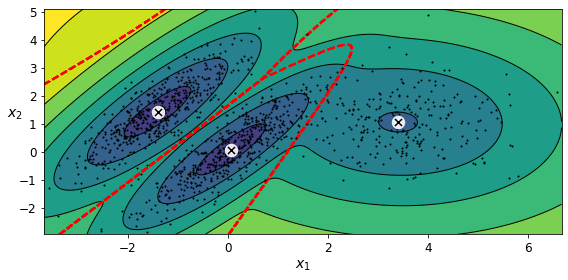

In [0]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

- *Cluster means, decision boundaries, and density contours of a trained Gaussian mixture model*
- the model performed well and found an excellent solution, however, we generated easy data by using a set of 2D Gaussian distributions
- we also told the algorithm the correct number of clusters 

## Imposing Constraints

---
**Another Drawback of Gaussian Mixtures**

---
- **when there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution**
---
**How to Compensate**

---
- in order to compensate, you need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn
- one way to do this is to **limit the range of shapes and orientations that the clusters have**, which can be achieved by imposing contraints on the convariance matrices
- **to do this, set the covariance_type to one of the following values:**
You can impose constraints on the covariance matrices that the algorithm looks for by setting the `covariance_type` hyperparameter:
* `"tied"`: all clusters must have the same shape, which can be any ellipsoid (i.e., they all share the same covariance matrix)
* `"spherical"`: all clusters must be spherical, but they can have different diameters (i.e., different variances)
* `"diag"`: clusters can take on any ellipsoidal shape of any size, but the ellipsoid's axes must be parallel to the axes (i.e., the covariance matrices must be diagonal)
---
* `"full"` (default): no constraint, all clusters can take on any ellipsoidal shape of any size

In [0]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [0]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

Saving figure covariance_type_plot


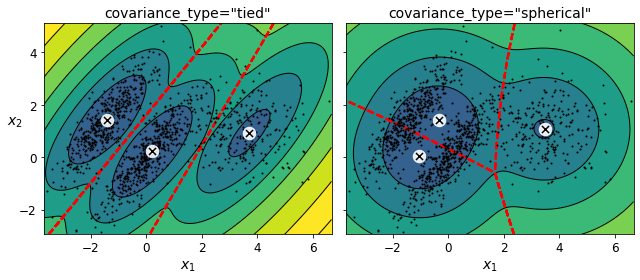

In [0]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

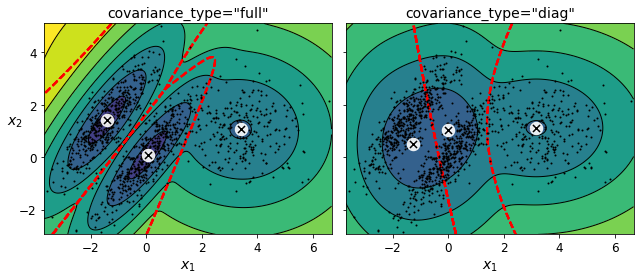

In [0]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

- the computational complexity of training a GaussianMixture model depends on the number of instances $m$, the number of dimensions $n$, the number of clusters $k$, and the constraints on the covariance matrices 


## Anomaly Detection

---
**Anomaly Detection**

---
- also called *outlier detection* | detect instances that deviate strongly from the norm
- these instances are *anomalies* or *outliers* | normal instances = *inliers*
- in addition to detecting fraud and defective products, **anomaly detection can remove outliers from a dataset before training another model (as a preprocessing step)**, which can significantly improve the performance of the resulting model
---
**Anomaly Detection Using Gaussian Mixtures**

---
- for using a Gaussian mixture model, **any instance in a low-density region is considered an anomaly**
- **must define the threshold**
- here's how you would identify the outliers using the fourth percentile lowest density as the threshold (approximately 4% of the instances will be flagged as anomalies)

In [0]:
# creating a density threshold (USEFUL CODE)
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
len(anomalies)

50

Saving figure mixture_anomaly_detection_plot


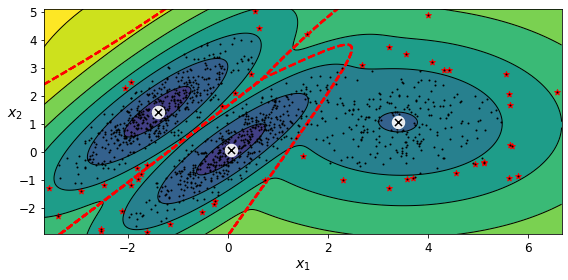

In [0]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

- a closely related task is *novelty detection*
- **novelty detection is assumed to be trained on a "clean" dataset, uncontaminated by outliers**
- anomaly (outlier) detection does not make this assumption as it is often used to clean up a dataset
---
**Dealing With Too Many Anomalies (useful tip)**

---
- Gaussian mixture models try to fit all the data, including the outliers, so if there is too many outliers in the dataset, the model's view of "normality" will be diluted
- in this case, remove the extreme outliers and fit the model again on the cleaned-up dataset
- another approach is to use robust covariance estimation methods (EllipticEnvelope class)

## Selecting the Number of Clusters for Gaussian Mixtures 

- with K-Means, you could use the inertia or silhouette score to select the appropriate number of $k$ clusters (or even GridSearchCV for K-Means as a preprocessing step for another algorithm), however these strategies are not possible for Gaussian Mixtures as they only apply to clusters of similar shapes/sizes
---
- **for Gaussian mixtures, find the model that minimizes a *theoretical information criterion***, such as *Bayesian information criterion* (BIC) or the *Akaike information criterion* (AIC) 
- **both BIC and AIC penalize models that have too many parameters (too many clusters) and reward models that fit the data well and often select the same model**
- when BIC and AIC differ, BIC tends to select a simpler model (fewer parameters) than AIC, but tends to not fit the data quite as well (especially true for larger datasets) 
- **with that said, use AIC for problems with larger datasets**

In [0]:
gm.bic(X) # computing the bic

8189.733705221635

In [0]:
gm.aic(X) # computing the aic

8102.508425106597

- let's train Gaussian Mixture models with various values of $k$ and measure their BIC: 

In [0]:
# IMPORTANT/USEFUL CODE
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [0]:
# IMPORTANT/USEFUL CODE
bics = [model.bic(X) for model in gms_per_k] 
aics = [model.aic(X) for model in gms_per_k]

Saving figure aic_bic_vs_k_plot


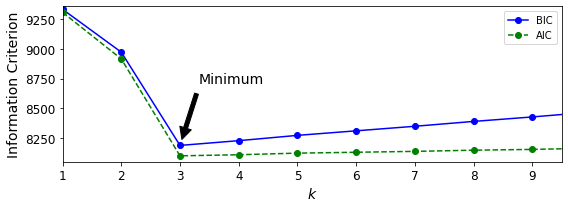

In [0]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

- both BIC and AIC are lowest when $k$=3, so that is most likely the best choice
- let's search for best combination of values for both the number of clusters and the `covariance_type` hyperparameter:

In [0]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [0]:
best_k

3

In [0]:
best_covariance_type

'full'

## Bayesian Gaussian Mixture Models (good for determining optimal number of clusters)

---
**Bayesian Gaussian Mixture Models**

---
- **good for finding the optimizing the number of clusters**
- rather than manually searching for the optimal number of clusters (as done above), use the `BayesianGaussianMixture` class, which is capable of giving weights equal (or close to) zero to unnecessary clusters
- set the number of clusters (n_components) to a value that you have good reason to believe is **greater than the optimal number of clusters**, and the algorithm will automatically eliminate the unnecessary custers

In [0]:
from sklearn.mixture import BayesianGaussianMixture

In [7]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

- determining the optimal number of clusters

In [8]:
np.round(bgm.weights_, 2) # as you can see below, only 3 clusters are needed

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

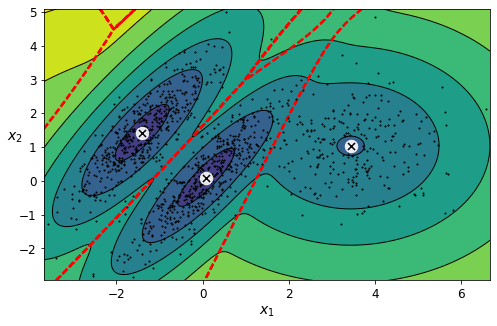

In [15]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

- in this model, the cluster parameters (weights, means, and covariance matrices) are no longer treated as fixed model parameters

---
**Concentration Priors**

---
- the prior belief about the number of clusters can be adjusted using the `weight_concentration_prior` hyperparameter
- setting it to 0.01 or 10,000 gives very different clusterings
- the more data we have, the less the priors matter

In [16]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=1000, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=1,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=10000,
                        weight_concentration_prior_type='dirichlet_process')

In [17]:
np.round(bgm_low.weights_, 2)

array([0.49, 0.51, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [18]:
np.round(bgm_high.weights_, 2)

array([0.43, 0.01, 0.01, 0.11, 0.01, 0.01, 0.01, 0.37, 0.01, 0.01])

Saving figure mixture_concentration_prior_plot


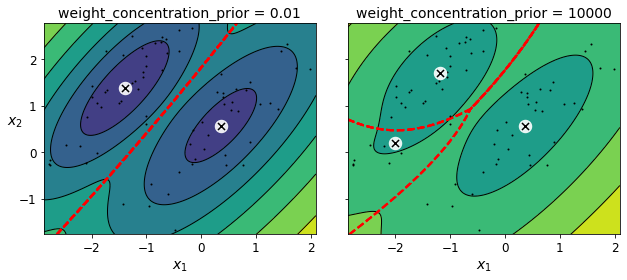

In [19]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

save_fig("mixture_concentration_prior_plot")
plt.show()

- *using different concentration priors on the same data results in different number of clusters*
---
**Other Facts**

---
- the computational complexity of the `BayesianGaussianMixture` class is similar to that of the `GaussianMixture` class, but significantly slower
- using Bayesian inference with deep neural networks is called Bayesian Deep Learning
- **Gaussian mixture models work great on clusters with ellipsoidal shapes, but not a datasets of different shapes**

In [0]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [22]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=10, n_init=10,
                        random_state=42, reg_covar=1e-06, tol=0.001, verbose=0,
                        verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [24]:
np.round(bgm.weights_, 2) # as you can see below, 8 clusters are needed

array([0.14, 0.12, 0.13, 0.17, 0.13, 0.12, 0.15, 0.06, 0.  , 0.  ])

Saving figure moons_vs_bgm_plot


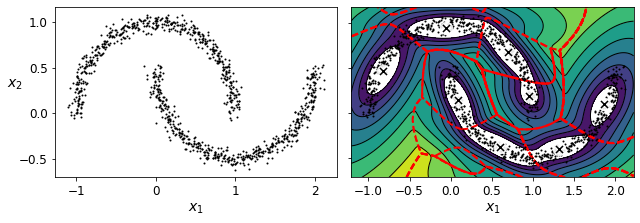

In [25]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

- the Gaussian mixture model desperately searched for ellipsoids, so it found eight different clusters instead of two
- the density estimation is not too bad, so the model could perhaps be used for anomaly detection, but it failed to identify two moons

# Other Algorithms for Anomaly and Novelty Detection (capable of dealing with arbitrarily shaped clusters)

---
**PCA (and other dimensionality reduction techniques with `inverse_transform()`**

---
- compare the reconstruction error of a normal instance with that of an anomaly, and the anomaly will have a much greater construction error
- **simple and efficient anomaly detection approach**

---
**Fast-MCD (minimum covariance determinant)**

---
- implemented through `EllipticEnvelope` class
- **useful for cleaning up a dataset through outlier detection**
- it assumes that the dataset is contaminated with outliers that were not generated by a single assumed Gaussian distribution (not a mixture)

---
**Isolation Forest**

---
- **efficient algorithm for detecting outliers (anomaly detection) in high-dimensional datasets** 
- algorithm builds a Random Forest where each Decision Tree is grown randomly
- picks a feature randomly at each node, then chooses a random threshold value
- through this process, the dataset is eventually chopped into pieces until all the instances are isolated from the other instances
- anomalies are usually farther away from other instances, so they tend to get isolated in fewer steps on average (across all Decision Trees) than normal instances

---
**Local Outlier Factor (LOF)**

---
- **good for outlier detection**
- compares density of instances around a given instance to the density around its neighbors, in which an anomaly is often more isolated than its $k$ nearest neighbors

---
**One-Class SVM**

---
- **better suited for novely detection in high-dimensional datasets**
- a kernelized SVM classifier separates two classes by first mapping all the instances to a high-dimensional space, then separating the two classes using a linear SVM classifer within this high-dimensional space
- a one-class SVM algorithm instead tries to separate the instances in high-dimensional space from the origin
- in the original space, this will correspond to finding a small region that encompasses all the instancs, and if a new instance does not fall within this region, it is an anomaly
- must tweak usual kernelized SVM hyperparameters + a margin hyperparameter
- **like all SVMS, it does not scale to large datasets**

# Exercises

---
**1) Clustering in Machine Learning**

---
- in Machine Learning, clustering is the **unsupervised task** of grouping (unlabeled) instances together
- sometimes, two nearby instances will be considered similar
- sometimes, similar instances may be far apart, but still belong to a densely packed group
- popular clustering algorithms include K-Means, DBSCAN, agglomerative clustering, BIRCH, Mean-Shift, affinity propagation, and spectral clustering

---
**2) The Applications of Clustering**

---
- primary applications of clustering include data analysis, customer segmentation, fraud detection, recommender systems, search engines, image segmentation, semi-supervised learning, dimensionality reduction, anomaly detection, and novelty detection

---
**3) Finding the Number $k$ Clusters for K-Means**

---
- **the elbow rule is a technique to select the optimal number $k$ of clusters while using K-Means**
- simply plot the inertia as a function of the number of clusters, and find the point in the curve where the inertia stops dropping fast (the "elbow")
- provides a close estimate for the optimal number of clusters
- **another approach is to plot the silhouette score as a function of the number of clusters**, where the optimal number of clusters lies near the peak
- the silhouette score is the mean silhouette coefficient over all instances
- the silhouette coefficient varies from +1 for instances that are well inside their cluster and far from other clusters, and -1 for instances that are very close to another cluster
- **if you are performing K-Means as a preprocessing step**, say, for the purposes of cleaning up a dataset, use **`GridSearchCV`** class to find the optimal number of clusters

---
**4) Label Propagation (semi-supervised learning technique)**

---
- labeling a dataset is costly and time-consuming
- therefore, it is common to have lots of unlabeled instances and few labeled instances
- **label propagation is the technique of copying some (or all) of the labels from the labeled instances to similar unlabeled instances**, which can greatly increase the number of labeled instances in a dataset, making it possible for a supervised learning algorithm to reach better performance (this is a form of semi-supervised learning)
- **one way to implement label propagation is to use a clustering algorithm such as K-Means** on all the instances, then for each cluster, find the most common label or the label of the most representative instance (the one closest to the centroid) and propagate it to the unlabeled instances in the same cluster

---
**5) Differences Amongst Algorithms**

---
- K-Means and BIRCH scale well to large datasets
- DBSCAN and Mean-Shift look for regions of high density
- plenty of information regarding various clustering algorithms above in the "other algorithms" sections

---
**6) Active Learning (semi-supervised learning technique)**

---
- active learning is **useful whenever you have plenty of unlabeled instances**
- active learning is where human experts interact with the learning algorithm
- the human experts provide labels for specific instances when the algorithm requests them
- **a common approach is uncertainty sampling**:
-- 1) the model is trained on the few labeled instances and then makes predictions for all the unlabeled instances
-- 2) the instances for which the model is most certain (when its estimated probability is lowest) are given to the expert to be manually labeled
-- 3) iterate the process until the performance improvement stops being worth the labeling effort


---
**7) Anomaly Detection vs. Novelty Detection**

---
- while often used interchangeably, they are **not the same thing**
- in **anomaly detection**, the algorithm is **trained on a dataset that may contain outliers and the goal is to identify these outliers** (within the training set), as well as outliers among new instances
- in **novelty detection**, the algorithm is **trained on a dataset that is presumed to be "clean," and the goal is to detect novelties stricly among new instances**
- the Isolation Forest works best for anomaly detection, while the one-class SVM algorithm is better suited for novvelty detection

---
**8) Gaussian Mixture Models**

---
- a Gaussian mixture model (GMM) is a **probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions with unknown parameters**
- in other words, **the assumption is that the data is grouped into a finite number of clusters, each with an ellipsoidal shape (but the clusters may have different ellipsoidal shapes, sizes, orientations, and densities), and we don't know which cluster each instance belongs to**
- Gaussian mixture models are useful for density estimation, clustering, and anomaly detection

---
**9) Determining the Optimal Number $k$ of Clusters for Gaussian Mixture Models**

---
- one approach to determining the optimal number $k$ of clusters for Gaussian mixture models is to **plot the** Bayesian information criterion **(BIC) or the** Akaike information criterion **(AIC) as a function of the number of clusters, then choose the number of clusters that minimizes the BIC or AIC**
- **another technique is to use a Bayesian Gaussian mixture model**, which automatically selects an appropriate amount of clusters by labeling unnecessary clusters as zero

---
### 10) Cluster the Olivetti Dataset
---

*Exercise: The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the `sklearn.datasets.fetch_olivetti_faces()` function.*

In [27]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces() # 400 instances, 40 class, dimensionality=4096

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [28]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [29]:
olivetti.target # 40 different people

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

*Exercise: Then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set.*

In [0]:
# Stratified Sampling --> ensures that there are the same number of images per person in each set
from sklearn.model_selection import StratifiedShuffleSplit 

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [32]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


- let's reduce the dataset's dimensionality using PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

*Exercise: Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter).*

In [35]:
from sklearn.cluster import KMeans # creating many K-Means models with various numbers of k clusters

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_train_pca)
    kmeans_per_k.append(kmeans)

k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


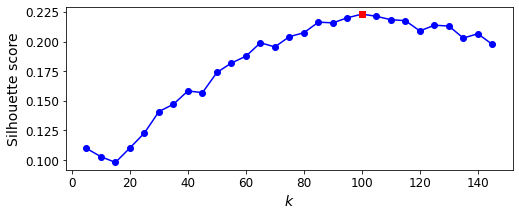

In [39]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [37]:
best_score

0.22310652

In [38]:
best_k

100

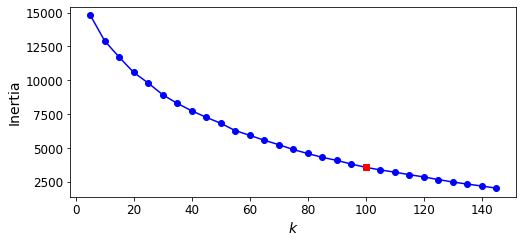

In [40]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()

In [0]:
best_model = kmeans_per_k[best_index]

Cluster 0


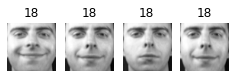

Cluster 1


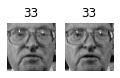

Cluster 2


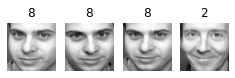

Cluster 3


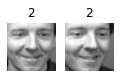

Cluster 4


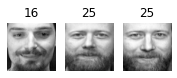

Cluster 5


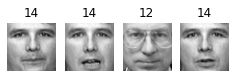

Cluster 6


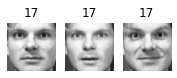

Cluster 7


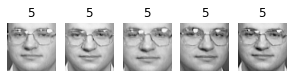

Cluster 8


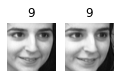

Cluster 9


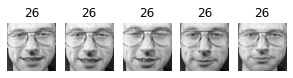

Cluster 10


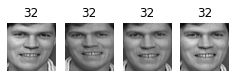

Cluster 11


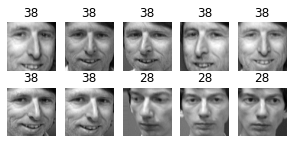

Cluster 12


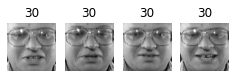

Cluster 13


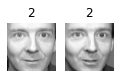

Cluster 14


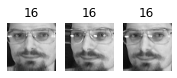

Cluster 15


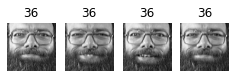

Cluster 16


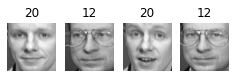

Cluster 17


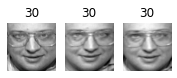

Cluster 18


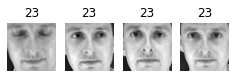

Cluster 19


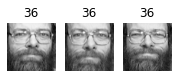

Cluster 20


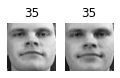

Cluster 21


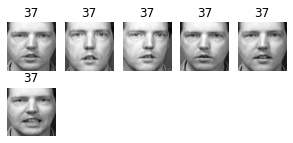

Cluster 22


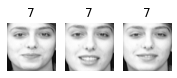

Cluster 23


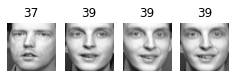

Cluster 24


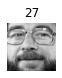

Cluster 25


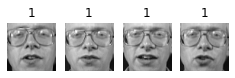

Cluster 26


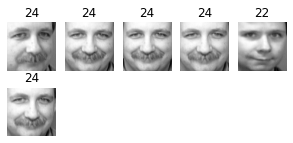

Cluster 27


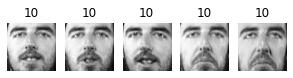

Cluster 28


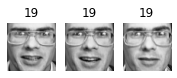

Cluster 29


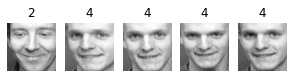

Cluster 30


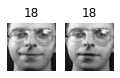

Cluster 31


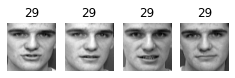

Cluster 32


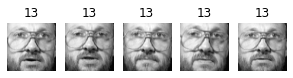

Cluster 33


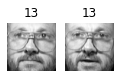

Cluster 34


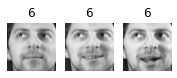

Cluster 35


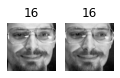

Cluster 36


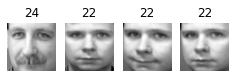

Cluster 37


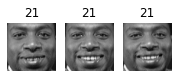

Cluster 38


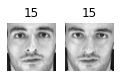

Cluster 39


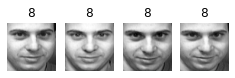

Cluster 40


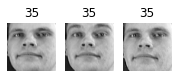

Cluster 41


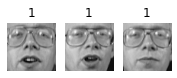

Cluster 42


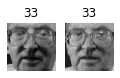

Cluster 43


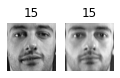

Cluster 44


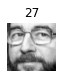

Cluster 45


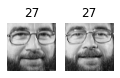

Cluster 46


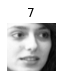

Cluster 47


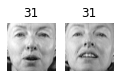

Cluster 48


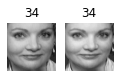

Cluster 49


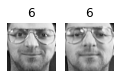

Cluster 50


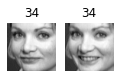

Cluster 51


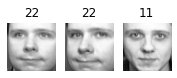

Cluster 52


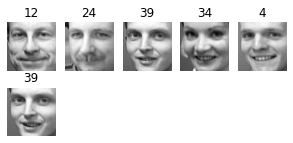

Cluster 53


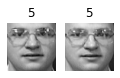

Cluster 54


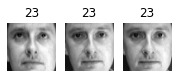

Cluster 55


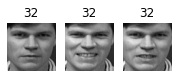

Cluster 56


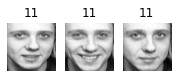

Cluster 57


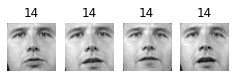

Cluster 58


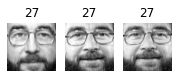

Cluster 59


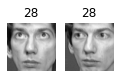

Cluster 60


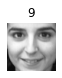

Cluster 61


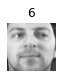

Cluster 62


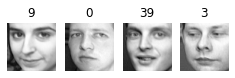

Cluster 63


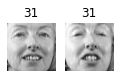

Cluster 64


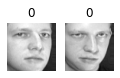

Cluster 65


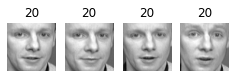

Cluster 66


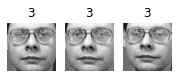

Cluster 67


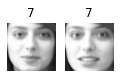

Cluster 68


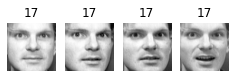

Cluster 69


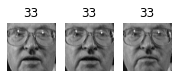

Cluster 70


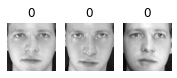

Cluster 71


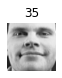

Cluster 72


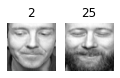

Cluster 73


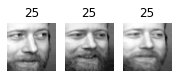

Cluster 74


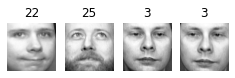

Cluster 75


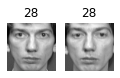

Cluster 76


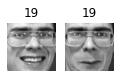

Cluster 77


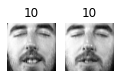

Cluster 78


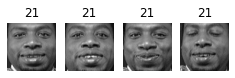

Cluster 79


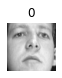

Cluster 80


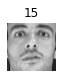

Cluster 81


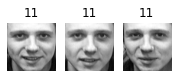

Cluster 82


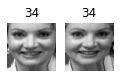

Cluster 83


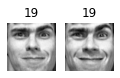

Cluster 84


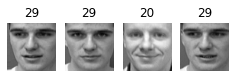

Cluster 85


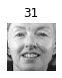

Cluster 86


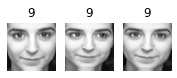

Cluster 87


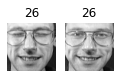

Cluster 88


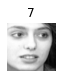

Cluster 89


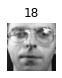

Cluster 90


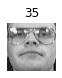

Cluster 91


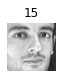

Cluster 92


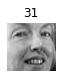

Cluster 93


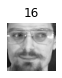

Cluster 94


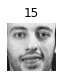

Cluster 95


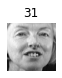

Cluster 96


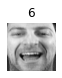

Cluster 97


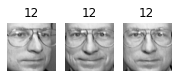

Cluster 98


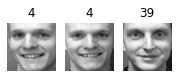

Cluster 99


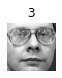

In [42]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

- not the best results as only a few clusters are useful (those containing more than 2 instances)
- **clustering images this way may be too precise to be directly useful when training a model, but it can be tremendously useful when trying to label new instances in a dataset**

---
### 11) Clustering as Preprocessing for Classification
---

*Exercise: Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set.*

In [47]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=150, random_state=42) # n_estimators=300 increases accuracy to 0.95
clf.fit(X_train_pca, y_train) # first, train on training set
clf.score(X_valid_pca, y_valid) # second, evaluate on validation set

0.925

*Exercise: Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set.*

In [49]:
from sklearn.pipeline import Pipeline

k_range = range(5, 200, 5) # trying out various numbers of clusters for K-Means

for n_clusters in k_range:
    pipeline = Pipeline([
        ("kmeans", KMeans(n_clusters=n_clusters, random_state=n_clusters)), # reduces dimensionality
        ("forest_clf", RandomForestClassifier(n_estimators=150, random_state=42)) # trains classifier
    ])
    pipeline.fit(X_train_pca, y_train)
    print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3375
10 0.5375
15 0.5875
20 0.6625
25 0.65
30 0.7375
35 0.725
40 0.75
45 0.6875
50 0.7
55 0.725
60 0.775
65 0.7625
70 0.7
75 0.7625
80 0.725
85 0.7125
90 0.7125
95 0.775
100 0.75
105 0.7375
110 0.75
115 0.7375
120 0.7125
125 0.7625
130 0.7375
135 0.775
140 0.8
145 0.75
150 0.7875
155 0.7
160 0.75
165 0.7
170 0.75
175 0.7625
180 0.7625
185 0.7375
190 0.7375
195 0.7625


- even by trying a wide range of values for the number $k$ of clusters, we never get beyond 80% accuracy, which means the distances to the cluster centroids are not as informative as the original images

- the clusters are not useful to directly train a classifier in this case (but they can still help when labelling new training instances)

---
### 12) A Gaussian Mixture Model for the Olivetti Faces Dataset
---

*Exercise: Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset's dimensionality (e.g., use PCA, preserving 99% of the variance).*

In [0]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)

# X_train_pca with 99% of variance preserved already created in exercise 10 
y_pred = gm.fit_predict(X_train_pca) # clustering algorithms do not handle labels, but that squeeze out every cent of information from the features

*Exercise: Use the model to generate some new faces (using the `sample()` method), and visualize them (if you used PCA, you will need to use its `inverse_transform()` method).*

In [0]:
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=20)
gen_faces = pca.inverse_transform(gen_faces_reduced)

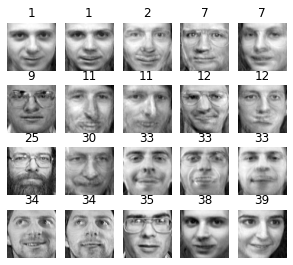

In [52]:
plot_faces(gen_faces, y_gen_faces)

*Exercise: Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the `score_samples()` method for normal images and for anomalies).*

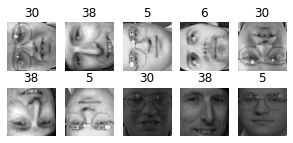

In [54]:
# rotating images
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

# flipping images
n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

# darkening images
n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

# detecting anomalies
X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [0]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [56]:
gm.score_samples(X_bad_faces_pca) # score of anomalies

array([-1.79997510e+07, -2.26427357e+07, -3.96415561e+07, -4.60254395e+07,
       -3.13975266e+07, -1.39330495e+07, -2.90882770e+07, -1.06298615e+08,
       -1.20930974e+08, -7.49739785e+07])

- the anomalies are considered highly unlikely be the Gaussian mixture model, just compare their scores with the scores of the actual training instances

In [57]:
gm.score_samples(X_train_pca[:10]) # score of training instances

array([1163.0202093 , 1149.16682369, 1148.47710431, 1170.6760289 ,
       1088.46009564, 1075.71700315, 1075.7170075 , 1088.4600894 ,
       1096.42609709, 1119.68627026])

---
### 13) Using Dimensionality Reduction Techniques for Anomaly Detection
---

*Exercise: Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.*

- dataset was already reduced using PCA earlier

In [58]:
X_train_pca

array([[ 3.78081870e+00, -1.85478783e+00, -5.14404106e+00, ...,
        -1.35633215e-01, -2.14082390e-01,  6.11918792e-02],
       [ 1.01488552e+01, -1.52754641e+00, -7.66972005e-01, ...,
         1.23938702e-01, -1.35264218e-01, -2.32756715e-02],
       [-1.00152893e+01,  2.87729931e+00, -9.19886231e-01, ...,
         7.26091713e-02, -2.96061928e-03,  1.24891475e-01],
       ...,
       [ 2.47586775e+00,  2.95597267e+00,  1.29985702e+00, ...,
        -2.09132396e-02,  3.48520577e-02, -1.54326335e-01],
       [-3.22031188e+00,  5.34898090e+00,  1.39427006e+00, ...,
         5.75526841e-02, -2.28311747e-01,  1.55578002e-01],
       [-9.22877133e-01, -3.64703012e+00,  2.26088071e+00, ...,
         1.36853680e-01, -6.91293478e-02,  6.26830086e-02]], dtype=float32)

In [0]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

In [60]:
reconstruction_errors(pca, X_train).mean() # reconstruction error of actual training instances

0.00019205351

In [61]:
reconstruction_errors(pca, X_bad_faces).mean() # reconstruction error of anomalies

0.004707354

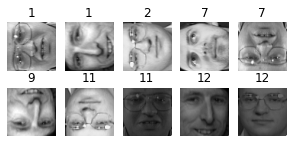

In [62]:
plot_faces(X_bad_faces, y_gen_faces)

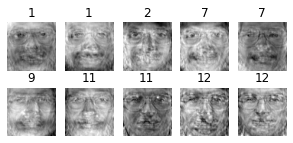

In [63]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_gen_faces) # scary